# CH2 监督学习

## 1 一些样本的数据集

In [1]:
# Common imports
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from sklearn.datasets import make_blobs

**模拟的forge数据集用于分类**：

In [3]:
X, y = make_blobs(n_samples=30, centers=2, random_state=4)
y[[7, 27]] = 0
mask = np.ones(len(X), dtype=np.bool)
mask[[0, 1, 5, 26]] = 0
X, y = X[mask], y[mask]

In [4]:
X.shape

(26, 2)

In [5]:
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['#0000aa', '#ff2020'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

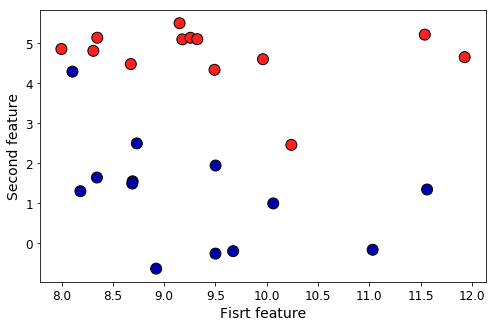

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=120, cmap=cm2, edgecolors='k')
plt.xlabel("Fisrt feature", fontsize=14)
plt.ylabel("Second feature", fontsize=14)
plt.show()

**模拟的wave数据集用于回归：**

In [7]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=40)  # shape: (40,)
y_no_noise = (np.sin(4 * X) + X)
y = (y_no_noise + rnd.normal(size=len(X))) / 2
X = X.reshape(-1, 1)  # shape: (40, 1)

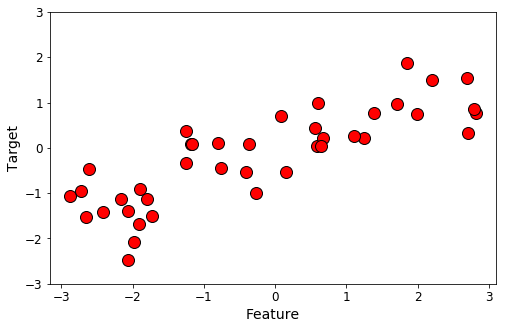

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'ro', markersize=12, markeredgecolor='k')
plt.ylim(-3, 3)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.show()

**cancer分类数据集：**

In [9]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer keys: \n{}".format(cancer.keys()))

cancer keys: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [10]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [11]:
cancer.data.shape

(569, 30)

In [12]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [13]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

**boston回归数据集：**

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()

In [15]:
boston.data.shape

(506, 13)

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

扩展数据集，添加13个特征两两相乘的乘积（104个）：

In [17]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

X = MinMaxScaler().fit_transform(boston.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [18]:
X.shape

(506, 104)

## 2 K近邻

只需要保存训练数据即可。想要对新数据进行预测时，算法会在训练数据集中找到最近的k个数据集点，也就是它的“最近邻”。

### 2.1 k近邻分类

+ froge数据集：

In [19]:
X, y = make_blobs(n_samples=30, centers=2, random_state=4)
y[[7, 27]] = 0
mask = np.ones(len(X), dtype=np.bool)
mask[[0, 1, 5, 26]] = 0
X, y = X[mask], y[mask]

将数据分为训练集和测试集：

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

拟合模型：

In [22]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
k_neighbors_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
print("Test set pred: {}".format(k_neighbors_clf.predict(X_test)))

Test set pred: [1 0 1 0 1 0 0]


In [25]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

评估模型泛化能力：

In [26]:
k_neighbors_clf.score(X_test, y_test)

0.8571428571428571

查看决策边界：

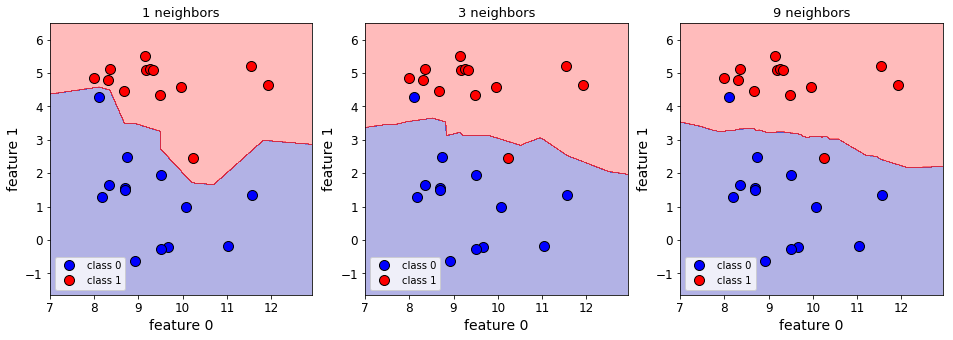

In [27]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1s = np.linspace(x1_min, x1_max, 1000)
x2s = np.linspace(x2_min, x2_max, 1000)
x1, x2 = np.meshgrid(x1s, x2s)
X_hand = np.c_[x1.ravel(), x2.ravel()]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for n_neighbors, ax in zip([1, 3, 9], axes):
    k_neighbors_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    k_neighbors_clf.fit(X, y)
    y_pred = k_neighbors_clf.predict(X_hand).reshape(x1.shape)
    ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bo", label="class 0",
            markersize=10, markeredgecolor='k')
    ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], "ro", label="class 1",
            markersize=10, markeredgecolor='k')
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=cm2)
    ax.set_title("{} neighbors".format(n_neighbors), fontsize=13)
    ax.legend(loc="lower left")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

plt.show()

> 随着邻居的增加，决策边界越来越平滑。更平滑的边界对应更简单的模型。使用更少的邻居对应更复杂的模型，而使用更多的邻居对应更低的模型复杂度。

+ cancer数据集：

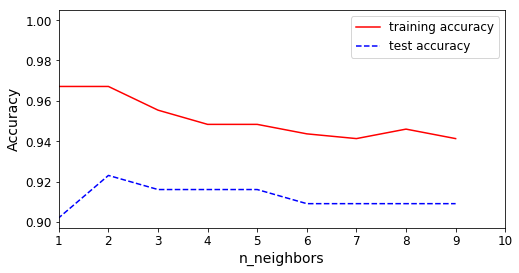

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=66)

training_accuracy = []
test_accuracy = []

# Try n_neighbors from 1 to 10
for n_neighbors in range(1, 11):
    # Build the model
    k_neighbors_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    k_neighbors_clf.fit(X_train, y_train)
    # Record training accuracy
    training_score = k_neighbors_clf.score(X_train, y_train)
    training_accuracy.append(training_score)
    # Record test accuracy
    test_score = k_neighbors_clf.score(X_test, y_test)
    test_accuracy.append(test_score)

plt.figure(figsize=(8, 4))
plt.plot(training_accuracy, 'r-', label="training accuracy")
plt.plot(test_accuracy, 'b--', label="test accuracy")
plt.xlabel("n_neighbors", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.xlim(1, 10)
plt.show()

> 仅考虑一个邻居时，训练集上的预测结果非常完美。但随着邻居个数的增加，模型变得简单，训练精度也随之下降。单一邻居时的测试精度比使用更多邻居时要低，这表示单一近邻的模型过于复杂。

### 2.2 k近邻回归

In [29]:
from sklearn.neighbors import KNeighborsRegressor

+ wave数据集：

In [30]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=40)  # shape: (40,)
y_no_noise = (np.sin(4 * X) + X)
y = (y_no_noise + rnd.normal(size=len(X))) / 2
X = X.reshape(-1, 1)  # shape: (40, 1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
k_neighbors_reg = KNeighborsRegressor(n_neighbors=3)
k_neighbors_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [33]:
print("Test set pred:\n{}".format(k_neighbors_reg.predict(X_test)))

Test set pred:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [34]:
k_neighbors_reg.score(X_test, y_test)

0.83441724462496036

> $R^2$分数（决定系数），是回归模型预测的优度度量，0（常数模型）到1（完美）之间。

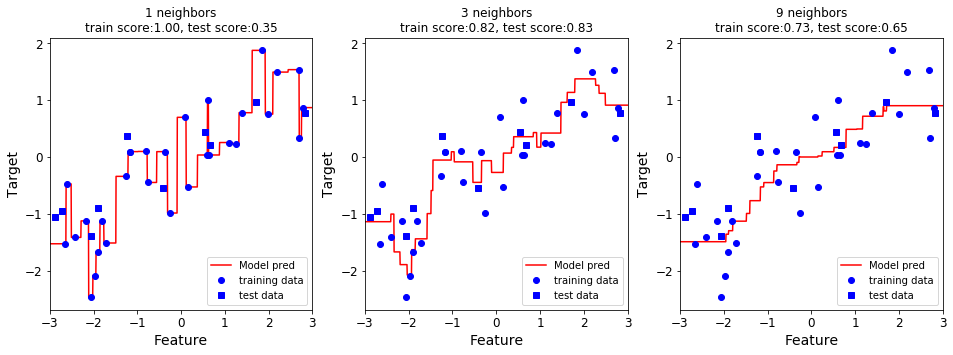

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

X_hand = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    k_neighbors_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    k_neighbors_reg.fit(X_train, y_train)
    y_pred = k_neighbors_reg.predict(X_hand)
    training_score = k_neighbors_reg.score(X_train, y_train)
    test_score = k_neighbors_reg.score(X_test, y_test)
    ax.plot(X_hand, y_pred, 'r-', label="Model pred")
    ax.plot(X_train, y_train, "bo", label="training data")
    ax.plot(X_test, y_test, "bs", label="test data")
    ax.set_xlim(-3, 3)
    ax.legend(loc='lower right')
    ax.set_xlabel("Feature", fontsize=14)
    ax.set_ylabel("Target", fontsize=14)
    ax.set_title("{} neighbors\ntrain score:{:.2f}, test score:{:.2f}".format(
        n_neighbors, training_score, test_score))
plt.show()

> 使用单一邻居，训练集中每个点都对预测结果有显著影响，预测结果的图像经过所有数据点。这导致预测结果非常不稳定。考虑更多的邻居之后，预测结果变得更加平滑，但对训练数据的拟合也不好。

### 2.3 缺点和优点

在实践中，使用较小的邻居个数（3个或5个）往往可以得到比较好的结果，但应该调节这个参数。默认使用欧式距离，在很多情况下的效果都很好。

**数据预处理很重要。**

优点：
1. 容易理解，通常不需要多调节就可以得到不错的性能。
2. 使用更高级的算法之前，可以使用当作基准算法。
3. 构建K近邻模型的速度通常很快。

缺点：
1. 如果数据集很大（特征数很多或样本数很大），预测速度会比较慢。
2. 对于大多数特征的大多数取值为0的数据集（所谓的**稀疏数据集**）来说，这一算法的结果尤其不好。

> 因为缺点，往往在实践中不会用到该算法。

## 3 线性模型

### 3.1 线性回归（OLS）

+ wave数据集：

In [36]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=60)  # shape: (60,)
y_no_noise = (np.sin(4 * X) + X)
y = (y_no_noise + rnd.normal(size=len(X))) / 2
X = X.reshape(-1, 1)  # shape: (60, 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

斜率或权重：

In [40]:
# Estimated coefficients for the linear regression problem
linear_reg.coef_

array([ 0.39390555])

偏移或截距：

In [41]:
# Independent term in the linear model
linear_reg.intercept_

-0.031804343026759746

In [42]:
print("Training set score: {:.2f}".format(linear_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear_reg.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


> 结果不是很好。训练集和测试集上的分数非常接近。这说明可能存在欠拟合，而不是过拟合。

+ boston数据集：

In [43]:
X = MinMaxScaler().fit_transform(boston.data)
# shape: (506, 105)
X = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X)

In [44]:
y = boston.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print("Training set score: {:.2f}".format(linear_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear_reg.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


> 训练集和测试集之间的性能差异是过拟合的明显标志。

标准线性回归最常用的替代方法之一是——**岭回归（ridge regression）**。

### 3.3 岭回归

预测公式与OLS相同。但在岭回归中，对系数（w）的选择不仅要在训练数据上得到好的预测结果，而且还要拟合附加约束。还希望系数尽可能小，即系数w的所有元素都应接近于0。主观上看，这意味着每个特征对输出的影响尽可能小（即斜率很小），同时仍能给出很好的预测。

这种约束是所谓**正则化（regularization）**的一个例子。**正则化**是指对模型做显示约束，以避免过拟合。

岭回归用到的这种称为L2正则化。

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
print("Training set score: {:.2f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_reg.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [51]:
ridge_reg.coef_

array([  0.00000000e+00,  -1.45195306e+00,  -1.55625501e+00,
        -1.45850339e+00,  -1.28253037e-01,  -8.52751992e-02,
         8.32260468e+00,   2.54137713e-01,  -4.94126282e+00,
         3.90318054e+00,  -1.05389293e+00,  -1.58274105e+00,
         1.02803317e+00,  -4.01360137e+00,   4.36959418e-01,
         3.61745975e-03,  -8.74003709e-01,   7.45133472e-01,
        -1.48860902e+00,  -1.67522332e+00,  -1.44622038e+00,
        -5.55323714e-02,  -1.78550090e+00,  -1.50277930e+00,
        -1.36385715e+00,  -1.59141256e+00,  -5.34745744e-01,
         2.62135084e+00,  -2.09149627e+00,   1.96201591e-01,
        -2.77151091e-01,   5.11228006e+00,  -1.67212612e+00,
        -9.62022116e-02,   6.33380690e-01,  -6.07839844e-01,
         3.96903030e-02,  -1.27556962e+00,  -2.91333873e+00,
         3.39477673e+00,   7.91219273e-01,   1.35663683e+00,
        -4.03862042e+00,   2.33027993e+00,  -3.37422177e+00,
         1.82152566e+00,   3.01788004e+00,  -1.89823583e+00,
        -2.59921330e-01,

**增大alpha会使得系数更加趋向于0，从而降低训练集性能，但可能会提高泛化性能。**

In [52]:
ridge10_reg = Ridge(alpha=10)
ridge10_reg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
print("Training set score: {:.2f}".format(ridge10_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10_reg.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [54]:
ridge10_reg.coef_

array([  0.00000000e+00,  -8.13689900e-01,   6.47624096e-01,
        -8.09069366e-01,   3.11198225e-01,  -6.85925930e-01,
         4.38593449e+00,  -1.47445671e-01,  -2.44271803e+00,
         8.46353010e-01,  -1.14693390e+00,  -2.33238633e+00,
         1.06950259e+00,  -3.98476108e+00,  -5.96589431e-01,
         2.93203629e-03,  -5.22602899e-01,   1.40364038e-01,
        -6.47904991e-01,  -7.63479624e-01,  -7.49429425e-01,
        -3.89589923e-02,  -8.32010779e-01,  -7.54840522e-01,
        -6.77354859e-01,  -8.69619073e-01,  -3.24778913e-01,
         1.27363302e+00,  -3.37411519e-01,   6.31092531e-02,
         2.37060282e-01,   2.09823300e+00,   1.00873715e-01,
        -2.79339029e-01,   1.73132985e-01,  -3.33635214e-01,
        -3.74236571e-01,   6.98395101e-01,  -6.96346693e-01,
         7.80145567e-01,   3.74888812e-01,  -6.24706702e-01,
        -7.65025367e-01,   4.40787903e-02,  -1.04041037e+00,
         4.25019292e-01,   4.79167488e-01,  -3.84692131e-01,
        -9.74505240e-02,

**减小alpha可以让系数受到的限制更小。对于非常小的alpha值，系数几乎没有受到限制。**

In [55]:
ridge01_reg = Ridge(alpha=0.1)
ridge01_reg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
print("Training set score: {:.2f}".format(ridge01_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01_reg.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


In [57]:
ridge01_reg.coef_

array([  0.00000000e+00,  -2.42369024e+00,  -5.44004823e+00,
        -6.06891063e+00,  -7.84388599e-01,   1.24386681e+00,
         1.89702705e+01,   4.36613313e+00,  -1.11663297e+01,
         9.56288401e+00,  -7.20754938e-01,  -5.07038511e-01,
         5.97496430e+00,  -2.73101969e+00,   6.42817641e+00,
         2.24383797e-02,  -9.60932943e-01,   4.67446373e+00,
        -3.70921574e+00,   8.83871436e-01,  -3.67984555e+00,
         3.88516779e-01,  -3.61278794e+00,  -2.60698340e+00,
        -2.76742773e+00,   6.68924851e-01,  -1.02789547e+00,
         3.03954905e+00,  -2.66446453e+00,   4.28171509e+00,
        -2.96666346e+00,   8.68755769e+00,  -3.12861379e+00,
        -3.10156799e-01,   2.19864337e+00,   3.65300578e+00,
         2.28827584e+00,  -2.81915997e+00,  -6.17005400e+00,
         7.93670916e+00,   1.65588883e+00,   8.81109066e+00,
         1.15623241e+00,   5.71139550e+00,  -4.76064030e+00,
         5.09735099e+00,   8.01852242e+00,  -8.42566476e+00,
        -7.70634034e-01,

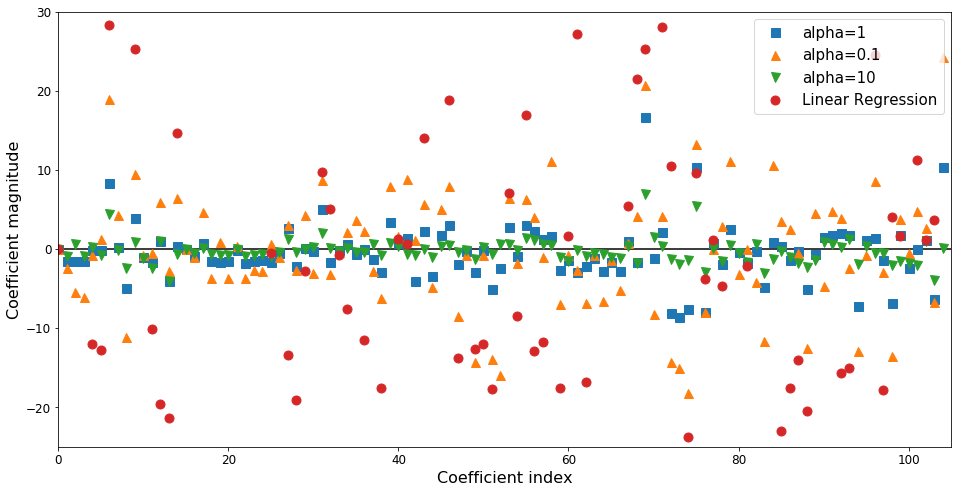

In [58]:
plt.figure(figsize=(16, 8))

plt.plot(ridge_reg.coef_, 's', markersize=9, label="alpha=1")
plt.plot(ridge01_reg.coef_, '^', markersize=9, label="alpha=0.1")
plt.plot(ridge10_reg.coef_, 'v', markersize=9, label="alpha=10")

plt.plot(linear_reg.coef_, 'o', markersize=9, label="Linear Regression")

plt.hlines(0, 0, len(linear_reg.coef_))
plt.xlabel("Coefficient index", fontsize=16)
plt.ylabel("Coefficient magnitude", fontsize=16)
plt.xlim(0, 105)
plt.ylim(-25, 30)
plt.legend(loc='upper right', fontsize=15)
plt.show()

> **alpha值越大，表示约束性更强，系数更小（越接近0）。**  
对于没有正则化的线性回归（alpha=0），点的范围比较大。

**理解正则化影响的另一种方法，就是固定alpha值，但改变训练数据量。**

In [59]:
from sklearn.model_selection import learning_curve, KFold

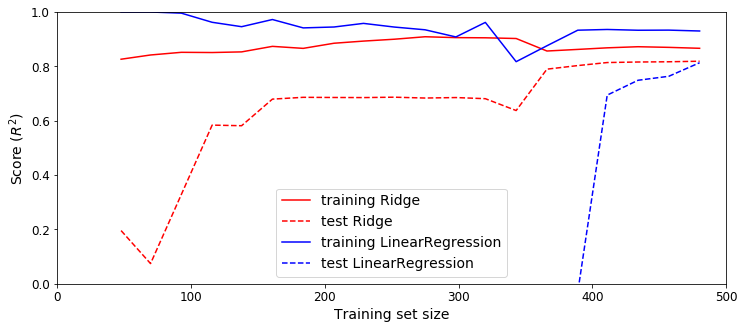

In [60]:
plt.figure(figsize=(12, 5))
training_set_size, training_score, test_score = learning_curve(
    Ridge(alpha=1), X, y, train_sizes=np.linspace(0.1, 1, 20),
    cv=KFold(20, shuffle=True, random_state=1))
plt.plot(training_set_size, training_score.mean(axis=1),
         'r-', label="training Ridge")
plt.plot(training_set_size, test_score.mean(axis=1),
         'r--', label="test Ridge")

training_set_size, training_score, test_score = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.1, 1, 20),
    cv=KFold(20, shuffle=True, random_state=1))
plt.plot(training_set_size, training_score.mean(axis=1),
         'b-', label="training LinearRegression")
plt.plot(training_set_size, test_score.mean(axis=1),
         'b--', label="test LinearRegression")

plt.xlim(0, 500)
plt.ylim(0, 1)
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("Score ($R^2$)", fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

> 1. 所有数据集大小对应的训练分数都要高于测试分数。  
2. 由于岭回归是正则化的，因此它的训练分数要整体比线性回归的训练分数要低。但岭回归的测试分数要更高，特别是对较小的数据集。如果小于400个数据点，线性回归学不到任何内容。  
3. **如果有足够多的训练数据，正则化变得不那么重要，并且岭回归和线性回归将具有相同的性能。（本例有巧合，在整个数据集下相同）**  
4. **如果添加更多的数据，模型将更加难以过拟合或记住所有的数据。**

### 3.4 Lasso

用到的是L1正则化。L1正则化的结果是，使用**Lasso时某些系数刚好为0**。这说明**某些特征被模型完全忽略**。这可以看作是**一种自动化的特征选择**。**某些系数刚好为0，这样模型更容易解释，也可以呈现模型最重要的特征**。

In [61]:
from sklearn.linear_model import Lasso

+ alpha=1

In [62]:
lasso = Lasso()  # alpha=1
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -5.3529079 , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.  

In [64]:
lasso.sparse_coef_.toarray()

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -5.3529079 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [65]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.29
Test set score: 0.21


> 在训练集和测试集上的表现都很差，这表示欠拟合。

In [66]:
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Number of features used: 4


> 只用到了105个特征中的4个。

**为了降低欠拟合，尝试较小的alpha**：

+ alpha=0.1

In [67]:
lasso_01 = Lasso(alpha=0.1)
lasso_01.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
print("Training set score: {:.2f}".format(lasso_01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_01.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.63


In [69]:
print("Number of features used: {}".format((lasso_01.coef_ != 0).sum()))

Number of features used: 8


+ alpha=0.01

In [70]:
# 增大max_iter值，否则会警告
lasso_001 = Lasso(alpha=0.01, max_iter=5000)
lasso_001.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
# 增大max_iter值，否则会警告
lasso_001 = Lasso(alpha=0.01, max_iter=5000)
lasso_001.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
print("Training set score: {:.2f}".format(lasso_001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_001.score(X_test, y_test)))

Training set score: 0.90
Test set score: 0.77


In [73]:
print("Number of features used: {}".format(np.sum(lasso_001.coef_ != 0)))

Number of features used: 33


> alpha减小，可以拟合一个更复杂的模型。

**如果把alpha设置得太小，那么会消除正则化的效果，并出现过拟合。**

In [74]:
lasso_00001 = Lasso(alpha=0.0001, max_iter=50000)
lasso_00001.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
print("Training set score: {:.2f}".format(lasso_00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_00001.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.64


In [76]:
print("Number of features used: {}".format(np.sum(lasso_00001.coef_ != 0)))

Number of features used: 94


对不同模型的系数进行作图分析：

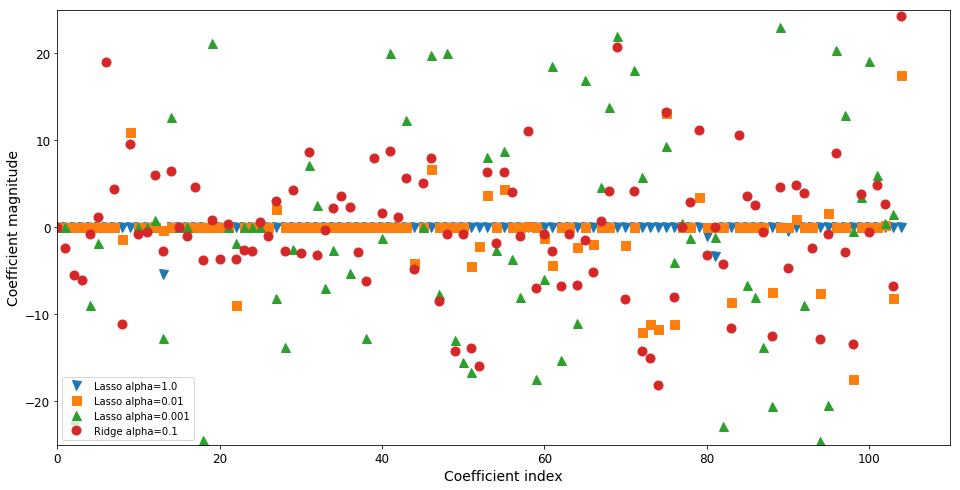

In [77]:
plt.figure(figsize=(16, 8))

plt.plot(lasso.coef_, 'v', markersize=9, label="Lasso alpha=1.0")
plt.plot(lasso_001.coef_, "s", markersize=9, label="Lasso alpha=0.01")
plt.plot(lasso_00001.coef_, '^', markersize=9, label="Lasso alpha=0.001")
plt.plot(ridge01_reg.coef_, 'o', markersize=9, label="Ridge alpha=0.1")

plt.xlim(0, 110)
plt.ylim(-25, 25)
plt.xlabel("Coefficient index", fontsize=14)
plt.ylabel("Coefficient magnitude", fontsize=14)
plt.legend(loc='best')
plt.show()

**在实践中，一般首选岭回归。但如果特征很多，认为只有几个是最重要的，那么选择Lasso可能更好。同样，Lasso可以给出更容易理解的模型，因为只选择了一部分输入特征。**

**`ElasticNet`结合了Lasso和Ridge的惩罚项，在实践中，这种结果的效果最好**，不过代价是要调节两个参数：一个用于L1正则化，一个用于L2正则化。

### 3.5 用于分类的线性模型

1. Logistic Regression, `linear_model.LogisticRegrsssion`
2. Linear support vector machine, `svm.LinearSVC`

+ forge数据集：

In [78]:
X, y = make_blobs(n_samples=30, centers=2, random_state=4)
y[[7, 27]] = 0
mask = np.ones(len(X), dtype=np.bool)
mask[[0, 1, 5, 26]] = 0
X, y = X[mask], y[mask]

In [79]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

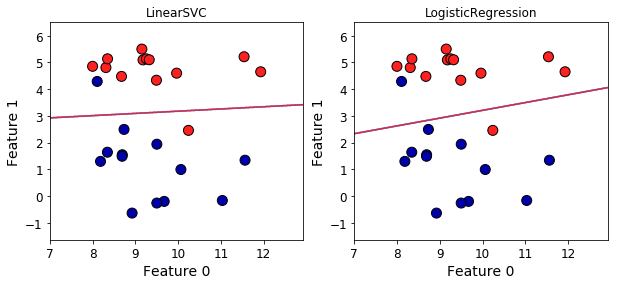

In [80]:
x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
x1s = np.linspace(x1_min, x1_max, 1000)
x2s = np.linspace(x2_min, x2_max, 1000)
x1, x2 = np.meshgrid(x1s, x2s)
X_hand = np.c_[x1.ravel(), x2.ravel()]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    y_pred = clf.predict(X_hand).reshape(x1.shape)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=100, edgecolors='k')
    ax.contour(x1, x2, y_pred, cmap=cm2, alpha=0.3)
    # ax.contourf(x1, x2, y_pred, cmap=cm2, alpha=0.3)
    ax.set_xlabel("Feature 0", fontsize=14)
    ax.set_ylabel("Feature 1", fontsize=14)
    ax.set_title("{}".format(model.__class__.__name__))
plt.show()

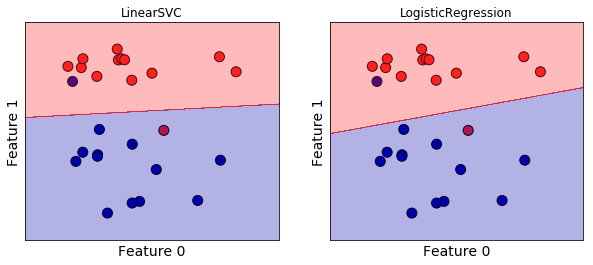

In [81]:
x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
x1s = np.linspace(x1_min, x1_max, 1000)
x2s = np.linspace(x2_min, x2_max, 1000)
x1, x2 = np.meshgrid(x1s, x2s)
X_hand = np.c_[x1.ravel(), x2.ravel()]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model
    model.fit(X, y)
    y_pred = clf.predict(X_hand).reshape(x1.shape)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=100, edgecolors='k')
    # ax.contour(x1, x2, y_pred, cmap=cm2, alpha=0.3)
    ax.contourf(x1, x2, y_pred, cmap=cm2, alpha=0.3)
    ax.set_xlabel("Feature 0", fontsize=14)
    ax.set_ylabel("Feature 1", fontsize=14)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("{}".format(model.__class__.__name__))
plt.show()

对于`Logistic Regression`和`LinearSVC`，**决定正则化强度的权衡参数为C。C值越大，对应的正则化越弱。**参数C值较大，那么`Logistic Regression`和`LinearSVC`将尽可能将训练集拟合到很好，而如果C值较小，那么模型更强调使系数向量接近于0。

较小的C值可以让算法尽量适应大多数数据点，而较大的C值更强调每个数据点都分类正确的重要性。

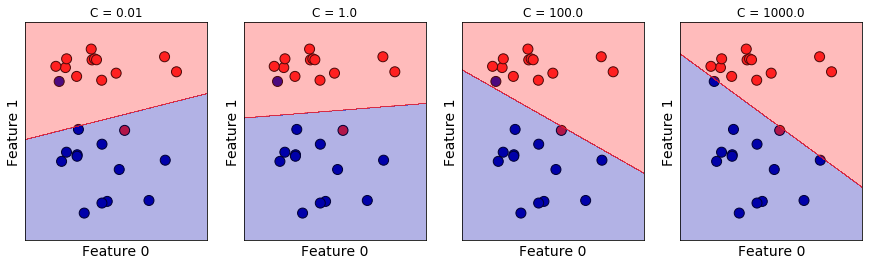

In [82]:
x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
x1s = np.linspace(x1_min, x1_max, 1000)
x2s = np.linspace(x2_min, x2_max, 1000)
x1, x2 = np.meshgrid(x1s, x2s)
X_hand = np.c_[x1.ravel(), x2.ravel()]

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

for C, ax in zip([0.01, 1.0, 100., 1000.], axes):
    clf = LinearSVC(C=C, random_state=42, tol=0.00001, dual=False)
    clf.fit(X, y)
    y_pred = clf.predict(X_hand).reshape(x1.shape)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=100, edgecolors='k')
    # ax.contour(x1, x2, y_pred, cmap=cm2, alpha=0.3)
    ax.contourf(x1, x2, y_pred, cmap=cm2, alpha=0.3)
    ax.set_xlabel("Feature 0", fontsize=14)
    ax.set_ylabel("Feature 1", fontsize=14)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = {}".format(clf.C))
plt.show()

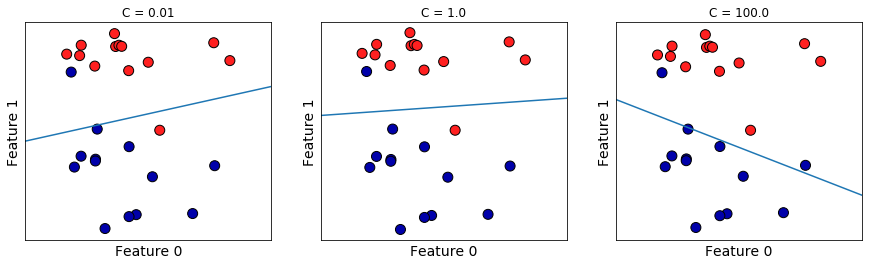

In [83]:
x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
xx = np.linspace(x1_min, x1_max, 1000)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for C, ax in zip([0.01, 1., 100.], axes):
    clf = LinearSVC(C=C, random_state=42)
    clf.fit(X, y)
    w = clf.coef_[0]
    ax.plot(xx, -w[0] / w[1] * xx - clf.intercept_[0] / w[1])
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=100, edgecolors='k')
    ax.set_xlabel("Feature 0", fontsize=14)
    ax.set_ylabel("Feature 1", fontsize=14)
    ax.set_xlim(x1_min, x1_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = {}".format(clf.C))
plt.show()

> 较小的C值可以让算法尽量适应大多数数据点，而较大的C值更强调每个数据点都分类正确的重要性。

+ cancer数据集：

C=1.0

In [84]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42)
log_reg_c1 = LogisticRegression(C=1.0)  # C = 1.0
log_reg_c1.fit(X_train, y_train)
print("Training set score: {:.4f}".format(log_reg_c1.score(X_train, y_train)))
print("Test set score: {:.4f}".format(log_reg_c1.score(X_test, y_test)))

Training set score: 0.9577
Test set score: 0.9580


> 在训练集上和测试集上都达到了95%，但性能非常接近，所以模型很可能是欠拟合的。

C=100.0

In [85]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42)
log_reg_c100 = LogisticRegression(C=100.)  # C = 100.
log_reg_c100.fit(X_train, y_train)
print("Training set score: {:.4f}".format(log_reg_c100.score(X_train, y_train)))
print("Test set score: {:.4f}".format(log_reg_c100.score(X_test, y_test)))

Training set score: 0.9742
Test set score: 0.9580


增大了C来拟合了一个更灵活的模型。

C=0.01

In [86]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42)
log_reg_c001 = LogisticRegression(C=0.01)  # C = 0.01
log_reg_c001.fit(X_train, y_train)
print("Training set score: {:.4f}".format(log_reg_c001.score(X_train, y_train)))
print("Test set score: {:.4f}".format(log_reg_c001.score(X_test, y_test)))

Training set score: 0.9249
Test set score: 0.9580


对比分析C去不同值时模型学到的系数：

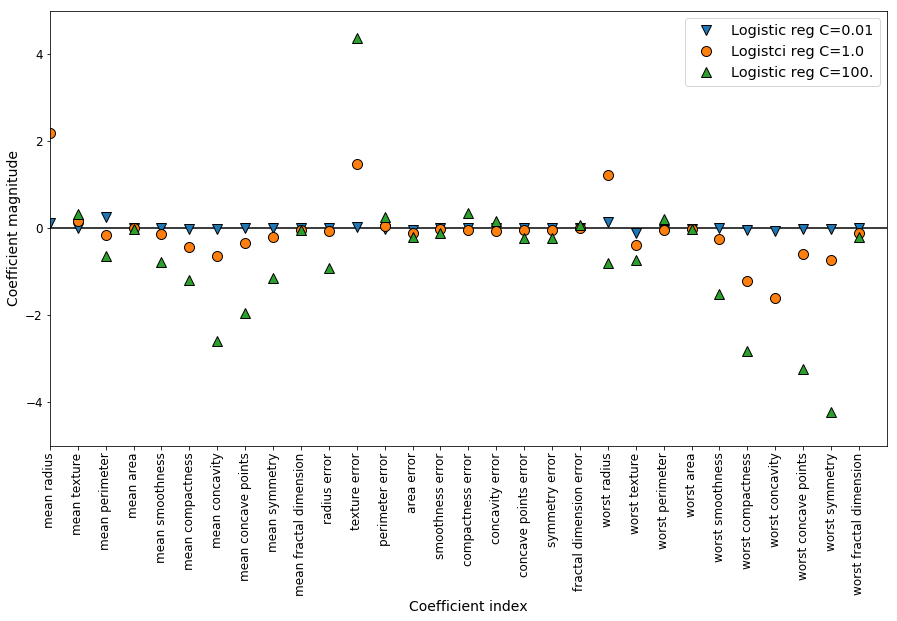

In [87]:
plt.figure(figsize=(15, 8))
plt.plot(log_reg_c001.coef_[0], 'v', markersize=10, markeredgecolor='k',
         label="Logistic reg C=0.01")
plt.plot(log_reg_c1.coef_[0], 'o', markersize=10, markeredgecolor='k',
         label="Logistci reg C=1.0")
plt.plot(log_reg_c100.coef_[0], '^', markersize=10, markeredgecolor='k',
         label="Logistic reg C=100.")
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlim(0, cancer.data.shape[1])
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.xlabel("Coefficient index", fontsize=14)
plt.ylabel("Coefficient magnitude", fontsize=14)
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

使用L1正则化得到一个解释性更强的模型，因为只是使用几个特征：

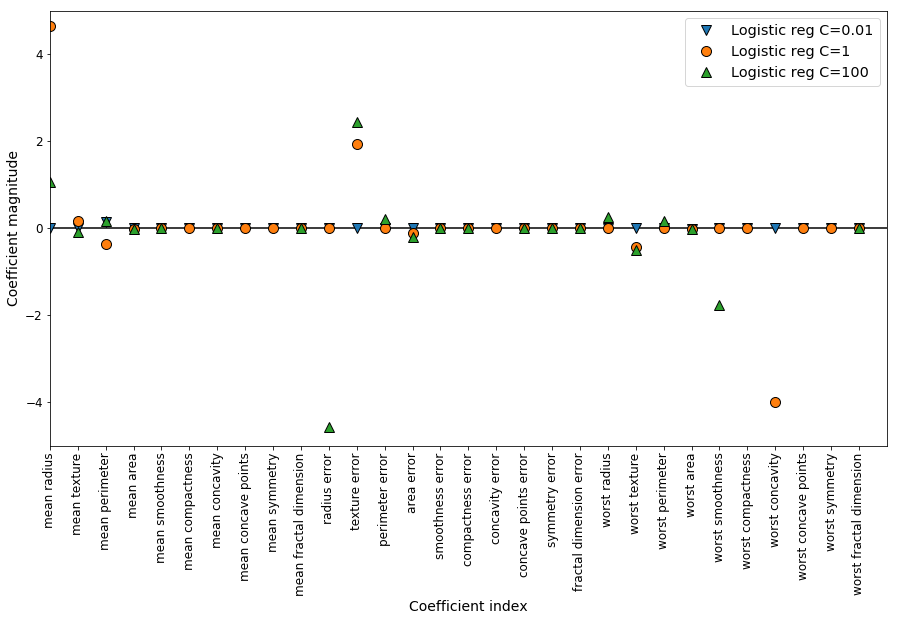

In [88]:
plt.figure(figsize=(15, 8))

for C, marker in zip([0.01, 1, 100], ['v', 'o', '^']):
    clf = LogisticRegression(C=C, penalty='l1')
    clf.fit(X_train, y_train)
    plt.plot(clf.coef_[0], marker, markersize=10, markeredgecolor='k',
             label="Logistic reg C={}".format(clf.C))
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlim(0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.xlabel("Coefficient index", fontsize=14)
plt.ylabel("Coefficient magnitude", fontsize=14)
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

### 3.6 用于多分类的线性模型

将二分类模型推广到多分类算法中一个常见的方法是**一对其余（one-vs.-rest）**。对每个类别都学习一个二分类模型，将这个类别与所有其他类别尽量分开，这样就生成了一个与类别个数一样多的二分类模型。

二维三类别数据集：

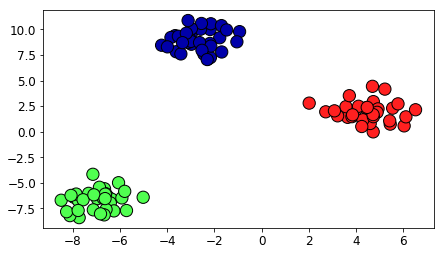

In [89]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

plt.figure(figsize=(7, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s =150, edgecolors='k', cmap=cm3)
plt.show()

In [90]:
linear_svc = LinearSVC()
linear_svc.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [91]:
linear_svc.coef_  # (n_classes, n_features)

array([[-0.17492305,  0.23141225],
       [ 0.47621532, -0.0693655 ],
       [-0.18913921, -0.20400545]])

In [92]:
linear_svc.intercept_  # (n_classes,)

array([-1.07745631,  0.13140622, -0.08604946])

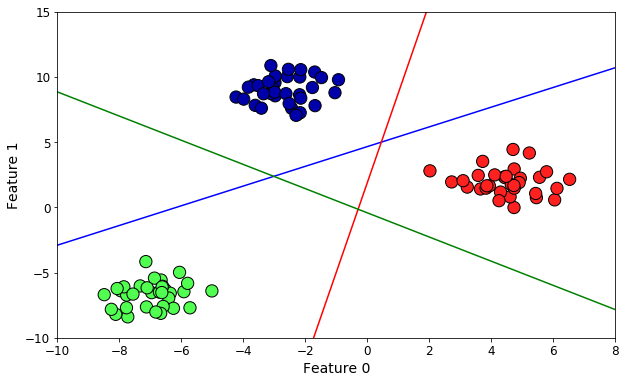

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s =150, edgecolors='k', cmap=cm3)

xx = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(xx, -(coef[0] * xx + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

> 三个分类器都将三角形区域内的点化为“其余”。三角形区域内的点属于最接近的那条直线对应的类别。

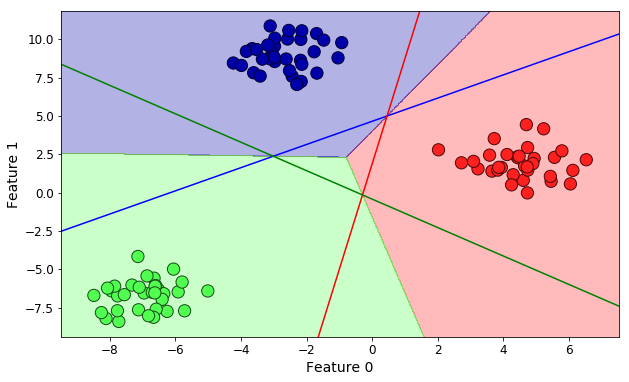

In [94]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1s = np.linspace(x1_min, x1_max, 1000)
x2s = np.linspace(x2_min, x2_max, 1000)
x1, x2 = np.meshgrid(x1s, x2s)
X_grid = np.c_[x1.ravel(), x2.ravel()]

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s =150, edgecolors='k', cmap=cm3)

xx = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(xx, -(coef[0] * xx + intercept) / coef[1], c=color)

y_pred = linear_svc.predict(X_grid).reshape(x1.shape)
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cm3)

plt.ylim(x2_min, x2_max)
plt.xlim(x1_min, x1_max)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## 4 朴素贝叶斯分类器

## 5 决策树

**本质上，从一层层if/else问题中进行学习，并得出结论。**

### 5.1 决策树分类

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [96]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42)

In [97]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [98]:
print("Training set size: {:.4f}".format(tree.score(X_train, y_train)))
print("Test set size: {:.4f}".format(tree.score(X_test, y_test)))

Training set size: 1.0000
Test set size: 0.9301


> 过拟合。可以设置树的深度。

In [99]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
print("Training set size: {:.4f}".format(tree.score(X_train, y_train)))
print("Test set size: {:.4f}".format(tree.score(X_test, y_test)))

Training set size: 0.9953
Test set size: 0.9441


> 限制树的深度可以减少过拟合。会降低训练集的精度，但可以提高测试集的精度。

**分析决策树：**

In [101]:
from sklearn.tree import export_graphviz
import graphviz

In [102]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

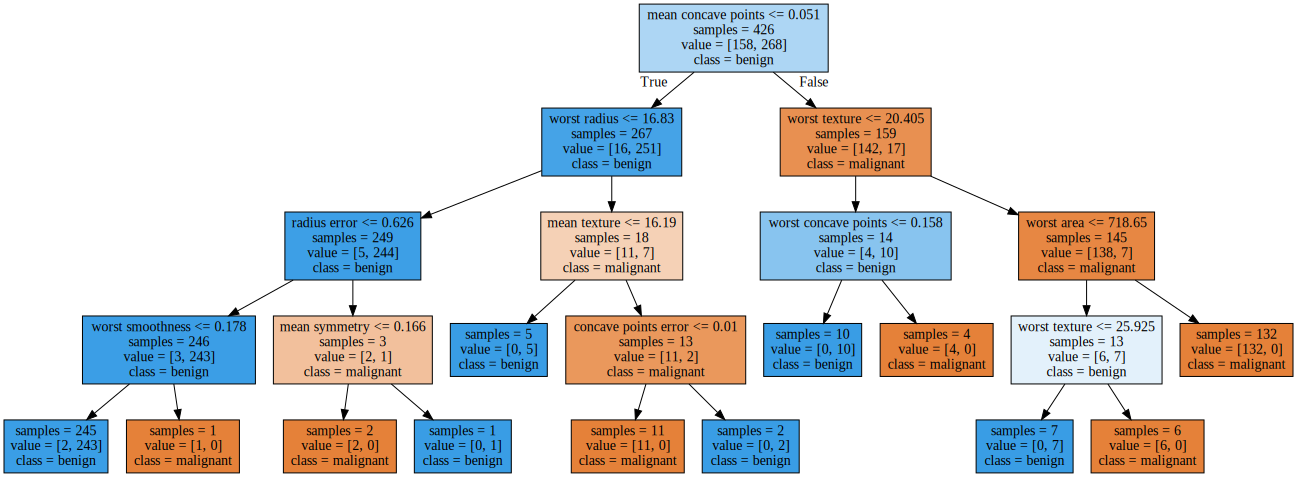

In [103]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**树的特征重要性**

In [104]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
print("Training set size: {:.4f}".format(tree.score(X_train, y_train)))
print("Test set size: {:.4f}".format(tree.score(X_test, y_test)))

Training set size: 0.9953
Test set size: 0.9441


In [106]:
tree.classes_

array([0, 1])

In [107]:
# The feature importances
tree.feature_importances_

array([ 0.        ,  0.02654067,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.71010827,  0.00684355,  0.        ,
        0.013032  ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01737208,  0.        ,  0.        ,
        0.06019401,  0.0912992 ,  0.        ,  0.03522339,  0.01005736,
        0.        ,  0.        ,  0.02932948,  0.        ,  0.        ])

> 值越大，特征越重要。

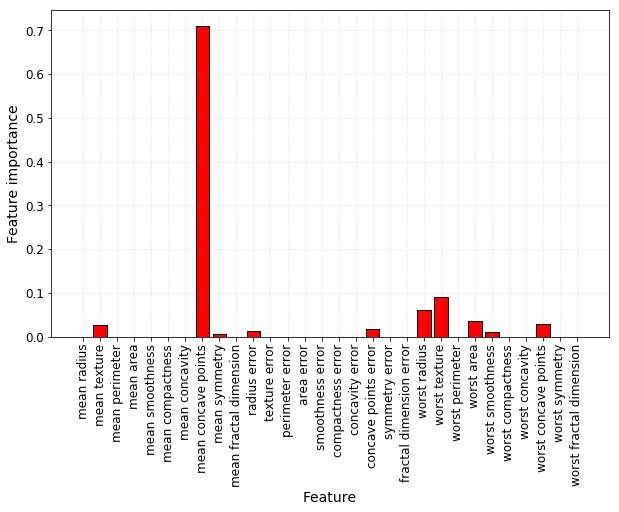

In [108]:
plt.figure(figsize=(10, 6))
plt.bar(range(cancer.data.shape[1]), tree.feature_importances_,
        color='r', edgecolor='k')
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Feature importance", fontsize=14)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.grid(color='grey', linestyle='--', alpha=0.2)
plt.show()

**如果某个特征的`feature_importance_`很小，并不能说明这个特征没有提供任何信息。这只能说明该特征没有被选中，可能是因为另一个特征也包含了同样的信息。**

特征重要性始终为非负数，也不能说明该特征对应哪个类别。

### 5.2 决策树回归

`DecisionTreeRegressor`（以及其他所有基于树的回归模型）不能**外推（extrapolate）**，也不能在训练数据范围之外进行预测。

In [109]:
ram_prices = pd.read_csv('ram_price.csv')
del ram_prices["Unnamed: 0"]

In [110]:
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


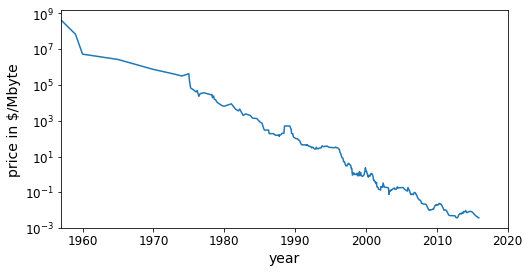

In [111]:
plt.figure(figsize=(8, 4))
plt.semilogy(ram_prices['date'], ram_prices['price'])
plt.xlabel("year")
plt.ylabel("price in $/Mbyte")
plt.xlim(1957, 2020)
plt.show()

In [112]:
from sklearn.tree import DecisionTreeRegressor

# 用历史数据预测2000年后的价格
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]  # (202, 1)
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 对所有数据进行预测
X_all = ram_prices.date[:, np.newaxis]

y_all_pred_tree = tree.predict(X_all)
y_all_pred_lr = linear_reg.predict(X_all)

# 对数变换逆运算
price_tree = np.exp(y_all_pred_tree)
price_lr = np.exp(y_all_pred_lr)

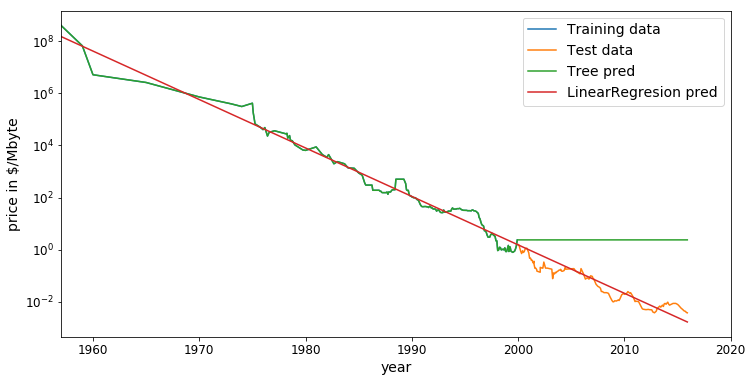

In [113]:
plt.figure(figsize=(12, 6))
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree pred")
plt.semilogy(ram_prices.date, price_lr, label="LinearRegresion pred")
plt.xlabel("year")
plt.ylabel("price in $/Mbyte")
plt.xlim(1957, 2020)
plt.legend(loc='best', fontsize=14)
plt.show()

> 线性模型给出了相当好的预测，不过忽略了训练数据和测试数据中一些更细微的变化。  
树模型完美地预测了训练数据，这是因为没有限制树的复杂度，因此记住了整个训练集。  
**一旦输入超出了训练数据的范围，模型就只能持续预测最后一个已知数据点。树不能在训练数据的范围之外生成“新的”响应。所有基于树的模型都有这个缺点。**

### 5.3 优点、缺点、参数

控制决策树模型复杂度的参数是预剪枝参数。通常来说，选择一种预剪枝策略（设置`max_depth`, `max_leaf_nodes`或`min_sampls_leaf`）。

**优点**
1. 得到的模型很容易可视化；
2. 算法完全不受数据缩放的影响。由于每个特征被单独处理，而且数据划分也不依赖与缩放，因此**决策树算法不需要特征预处理**。**特别是特征的尺度完全不一样时或二元特征和连续特征同时存在时，决策树的效果很好。**

**缺点**：即使做了预剪枝，也经常会过拟合，泛化性能很差。因此，在大多数应用中，**往往使用集成方法来替代单棵决策树**。

## 6 决策树集成

### 6.1 随机森林

**随机化方法：**
1. 通过选择用于构造树的数据点；
2. 通过选择每次划分测试的特征。

+ two_moons数据集：

In [114]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5, random_state=2)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [116]:
rf_clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [117]:
rf_clf.feature_importances_

array([ 0.4081634,  0.5918366])

In [118]:
rf_clf.n_features_

2

In [119]:
# The number of classes
rf_clf.n_classes_

2

In [120]:
np.unique(y)

array([0, 1], dtype=int64)

In [121]:
# The classes labels
rf_clf.classes_

array([0, 1], dtype=int64)

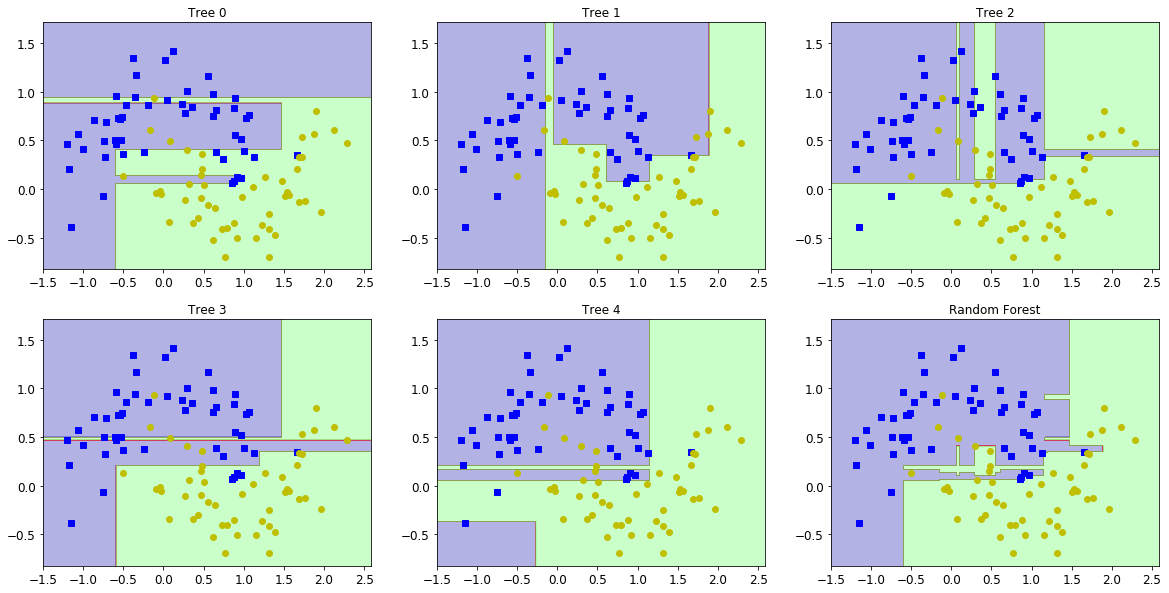

In [122]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

x_min, x_max = X_train[:, 0].min() - 0.3, X_train[:, 0].max() + 0.3
y_min, y_max = X_train[:, 1].min() - 0.3, X_train[: ,1].max() + 0.3
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

for i, (ax, tree) in enumerate(zip(axes.ravel(), rf_clf.estimators_)):
    ax.set_title("Tree {}".format(i))
    y_pred = tree.predict(X_grid).reshape(X1.shape)
    ax.contourf(X1, X2, y_pred, alpha=0.3, cmap=cm3)
    ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], "yo")

y_pred = rf_clf.predict(X_grid).reshape(X1.shape)
axes[-1, -1].contourf(X1, X2, y_pred, alpha=0.3, cmap=cm3)
axes[-1, -1].plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
axes[-1, -1].plot(X[:, 0][y == 1], X[:, 1][y == 1], "yo")
axes[-1, -1].set_title("Random Forest")
plt.show()

In [123]:
for i, tree in enumerate(rf_clf.estimators_):
    print("Tree {}:".format(i))
    print("Training set socre: {:.4f}\tTest set score: {:.4f}".format(
        tree.score(X_train, y_train), tree.score(X_test, y_test)))
print("\nRandom Forest: ")
print("Training set socre: {:.4f}\tTest set score: {:.4f}".format(
    rf_clf.score(X_train, y_train), rf_clf.score(X_test, y_test)))

Tree 0:
Training set socre: 0.8933	Test set score: 0.8400
Tree 1:
Training set socre: 0.9600	Test set score: 0.8800
Tree 2:
Training set socre: 0.9733	Test set score: 0.8000
Tree 3:
Training set socre: 0.8933	Test set score: 0.9200
Tree 4:
Training set socre: 0.9200	Test set score: 0.8800

Random Forest: 
Training set socre: 0.9600	Test set score: 0.9200


+ cancer数据集：

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [125]:
print("Accuracy on training set: {:.3f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


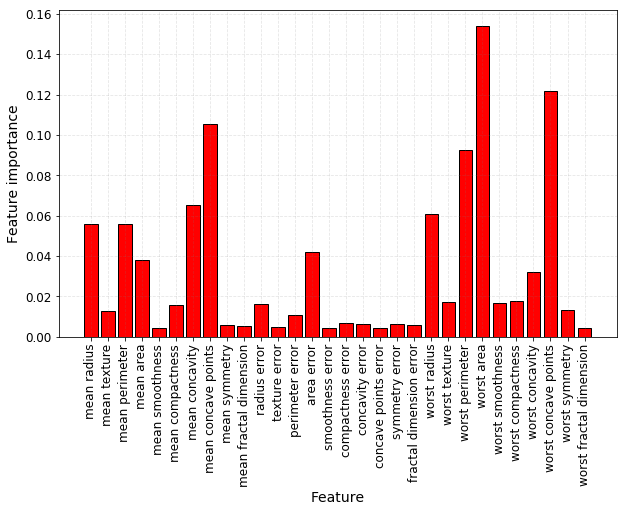

In [126]:
plt.figure(figsize=(10, 6))
plt.bar(range(cancer.data.shape[1]), rf_clf.feature_importances_,
        color='r', edgecolor='k')
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Feature importance", fontsize=14)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.grid(color='grey', linestyle='--', alpha=0.2)
plt.show()

> 随机森林给出的特征重要性要比单棵树给出的更为可靠。

### 6.2 梯度提升回归书（梯度提升机）

梯度提升采用连续的方式构造树，每棵树都试图纠正前一棵树的错误。默认情况下，没有随机化，而是用到了强预剪枝。通常树深很小（1到5之间），这样模型占用的内存更少，预测速度也更快。

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)  # cancer数据集

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_clf = GradientBoostingClassifier(random_state=42)
gbrt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [129]:
print("Accuracy on training set: {:.4f}".format(gbrt_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt_clf.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9580


> 训练集100%，很可能存在过拟合。

为降低过拟合，限制最大树深（gbrt中不会超过5）：

In [130]:
gbrt_clf = GradientBoostingClassifier(max_depth=1, random_state=42)
gbrt_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(gbrt_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt_clf.score(X_test, y_test)))

Accuracy on training set: 0.9906
Accuracy on test set: 0.9720


也可以降低**学习率`learning_rate`（用于控制每一棵树纠正前一棵树的错误的程度，较高意味着每棵树可以做出较强的修正，这样模型更为复杂）**来减低拟合度：

In [131]:
gbrt_clf = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
gbrt_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(gbrt_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt_clf.score(X_test, y_test)))

Accuracy on training set: 0.9883
Accuracy on test set: 0.9650


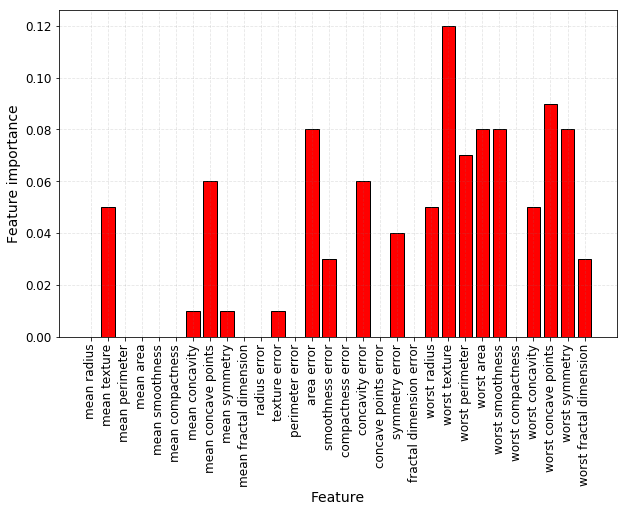

In [132]:
gbrt_clf = GradientBoostingClassifier(max_depth=1, random_state=42)
gbrt_clf.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.bar(range(cancer.data.shape[1]), gbrt_clf.feature_importances_,
        color='r', edgecolor='k', tick_label=cancer.feature_names)
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(rotation=90)
plt.grid(color='grey', linestyle='--', alpha=0.2)
plt.show()

> 和随机森林相比，梯度提升树完全忽略了某些特征。

**基于树的模型，通常不适用于高维稀疏数据。**

## 7 核支持向量机

In [133]:
# a carefully hand-designed dataset lol
X, y = make_blobs(centers=2, random_state=4, n_samples=30)
y[np.array([7, 27])] = 0
mask = np.ones(len(X), dtype=np.bool)
mask[np.array([0, 1, 5, 26])] = 0
X, y = X[mask], y[mask]

In [134]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
# Indices of support vectors
svm.support_

array([ 4, 23, 25, 11, 16])

In [136]:
# Support vectors
svm.support_vectors_

array([[  8.1062269 ,   4.28695977],
       [  9.50169345,   1.93824624],
       [ 11.563957  ,   1.3389402 ],
       [ 10.24028948,   2.45544401],
       [  7.99815287,   4.8525051 ]])

In [137]:
# Number of support vectors for each class.
svm.n_support_

array([3, 2])

In [138]:
svm.classes_

array([0, 1])

支持向量的类别标签由`dual_coef_`的正负号给出：

In [139]:
svm.dual_coef_

array([[-10.        ,  -6.25178295,  -3.73381586,  10.        ,
          9.98559881]])

In [140]:
X[:, 0].min(), X[:, 0].max()

(7.9981528721021213, 11.930271360747538)

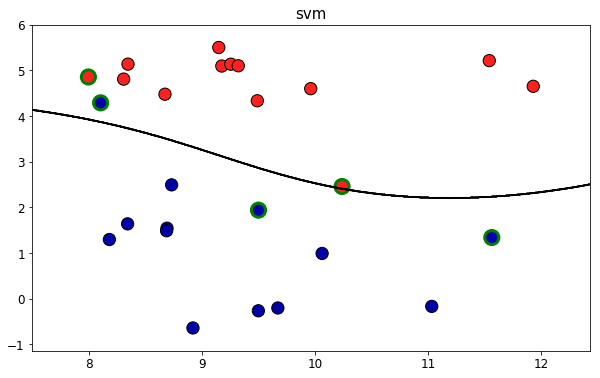

In [141]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

y_pred = svm.predict(X_grid)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolor='k', cmap=cm2)
plt.contour(X1, X2, y_pred.reshape(X1.shape), colors='k')
# 绘制支持向量
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            c=svm.dual_coef_.ravel() > 0, s=200, cmap=cm2, linewidth=3,
            edgecolors="g")
plt.ylim(y_min, y_max)
plt.title("svm", fontsize=15)
plt.show()

**`gamma`参数用于控制高斯核的宽度，他决定了点与点之间的“靠近”是指多大距离。**

**`C`是正则化参数，限制每个点的重要性（每个点的`dual_coef_`）。**

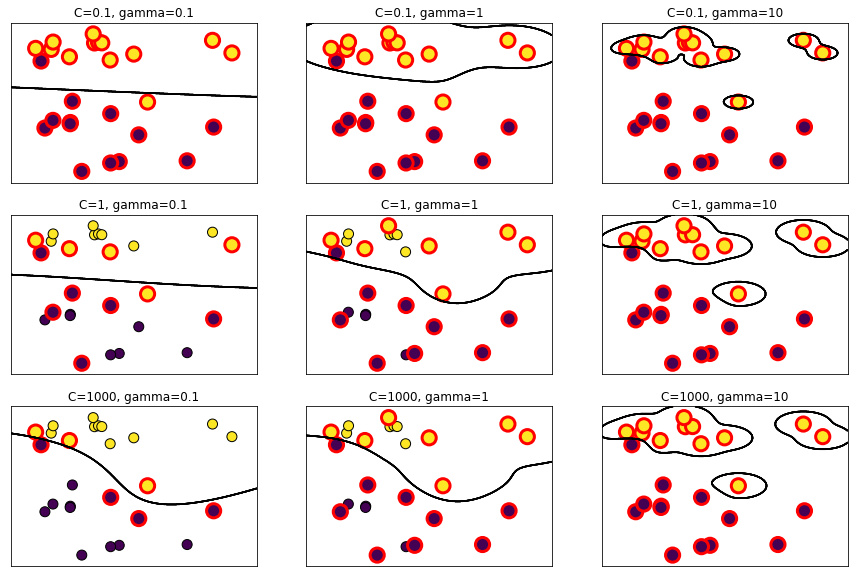

In [142]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx = np.linspace(x_min, x_max, 1000)
        yy = np.linspace(y_min, y_max, 1000)
        X1, X2 = np.meshgrid(xx, yy)
        X_grid = np.c_[X1.ravel(), X2.ravel()]
        
        svc = SVC(C=10 ** C, gamma=10 ** gamma, random_state=42)
        svc.fit(X, y)
        sv = svc.support_vectors_
        sv_labels = svc.dual_coef_.ravel() > 0
        y_pred = svc.predict(X_grid)
        a.contour(X1, X2, y_pred.reshape(X1.shape), colors='k')
        a.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k')
        a.scatter(sv[:, 0], sv[:, 1], c=sv_labels, s=200, edgecolors='r', linewidth=3)
        a.set_title("C={}, gamma={}".format(10 ** C, 10 ** gamma))
        a.set_xticks([])
        a.set_yticks([])
plt.show()

`gamma`和`C`控制的都是模型复杂度，较大的值对应更为复杂的模型。这两个参数的设定是强烈相关的，应该同时调节。

+ cancer数据集

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC(random_state=42)  # the default
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
print("Accuracy on training set: {:3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.000000
Accuracy on test set: 0.629371


> 过拟合。

通常SVM的表现都非常好，但**参数的设定**和**数据的缩放**都**非常敏感**。特别地，**要求所有特征有相似的变化范围**。

In [145]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [146]:
svc = SVC(random_state=42)  # the default
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948357
Accuracy on test set: 0.951049


> 欠拟合（训练集和测试集精度非常接近）。

增大C或gamma来拟合更为复杂的模型：

In [147]:
svc = SVC(C=100, random_state=42)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.985915
Accuracy on test set: 0.965035


## 8 分类器的不确定度估计

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

In [149]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]  # 重命名类别

X_train, X_test, y_train_named, y_test_named = train_test_split(
    X, y_named, stratify=y, random_state=0)

In [150]:
gbrt_clf = GradientBoostingClassifier(random_state=42)
gbrt_clf.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

### 8.1 decision_function

`decision_function`返回的是(n_samples,)，为每一个样本都返回一个浮点数：

In [151]:
gbrt_clf.decision_function(X_test)

array([-2.59983221,  3.95384362, -3.84772964, -6.58070382, -3.48076022,
        3.17204922, -1.47176759,  4.60212178, -1.24973818,  2.27616509,
        4.60212178,  1.30462505, -3.93475423,  3.88155747,  3.91566719,
       -4.69325634,  0.08677968, -3.48076022, -2.54741422, -3.29901775,
       -2.08406406, -4.8738433 ,  3.91566719,  3.52506185, -3.91995953])

**正值表示对正类的偏好，负值表示对反类（其他类）的偏好。**

In [152]:
gbrt_clf.predict(X_test)  # 预测值

array(['blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue',
       'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue',
       'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue'],
      dtype='<U4')

In [153]:
y_test_named  # 真实值

array(['red', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue',
       'red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue',
       'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red'],
      dtype='<U4')

In [154]:
gbrt_clf.classes_  # (反类, 正类)

array(['blue', 'red'],
      dtype='<U4')

**对于二分类问题，“反”类始终是`classes_`属性的第一个元素，“正”类始终是第二个元素。**

In [155]:
decision_values = gbrt_clf.decision_function(X_test)

print("Decision func minimum: {:.3f} maximum: {:.3f}".format(
    decision_values.min(), decision_values.max()))

Decision func minimum: -6.581 maximum: 4.602


> 由于可以任意缩放，因此`decision_function()`的输出往往难以解释。

### 8.2 predict_proba

输出的是每个类别的概率。对于二分类问题，形状是(n_samples, 2)。

In [156]:
gbrt_clf.predict(X_test)

array(['blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue',
       'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue',
       'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue'],
      dtype='<U4')

In [157]:
gbrt_clf.predict_proba(X_test)

array([[ 0.93085078,  0.06914922],
       [ 0.01881986,  0.98118014],
       [ 0.97911728,  0.02088272],
       [ 0.99861505,  0.00138495],
       [ 0.97013535,  0.02986465],
       [ 0.04023121,  0.95976879],
       [ 0.8133259 ,  0.1866741 ],
       [ 0.00993092,  0.99006908],
       [ 0.77725454,  0.22274546],
       [ 0.09311629,  0.90688371],
       [ 0.00993092,  0.99006908],
       [ 0.21338766,  0.78661234],
       [ 0.98082439,  0.01917561],
       [ 0.02020215,  0.97979785],
       [ 0.01953791,  0.98046209],
       [ 0.99092627,  0.00907373],
       [ 0.47831868,  0.52168132],
       [ 0.97013535,  0.02986465],
       [ 0.92739961,  0.07260039],
       [ 0.9643951 ,  0.0356049 ],
       [ 0.88934461,  0.11065539],
       [ 0.99241406,  0.00758594],
       [ 0.01953791,  0.98046209],
       [ 0.0286075 ,  0.9713925 ],
       [ 0.98054414,  0.01945586]])

In [158]:
gbrt_clf.classes_

array(['blue', 'red'],
      dtype='<U4')

**不确定度大小实际上反映了数据依赖于模型和参数的不确定度。过拟合强的模型可能会做出置信度更高的预测，即使可能是错的。复杂度低的模型通常对于预测的不确定度越大。**

### 8.3 多分类问题的不确定度

`decision_function`和`predict_proba`也可适用于多分类问题。都是(n_samples, n_classes)。

In [159]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=42)

gbrt_clf = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
gbrt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [160]:
gbrt_clf.classes_

array([0, 1, 2])

In [161]:
gbrt_clf.predict_proba(X_test)

array([[ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.78880668,  0.10599243,  0.10520089],
       [ 0.10229505,  0.10822475,  0.7894802 ],
       [ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.10825347,  0.66344934,  0.22829719],
       [ 0.78880668,  0.10599243,  0.10520089],
       [ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.10170311,  0.10829611,  0.79000078],
       [ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.10317625,  0.10986475,  0.786959  ],
       [ 0.78880668,  0.10599243,  0.10520089],
       [ 0.78880668,  0.10599243,  0.10520089],
       [ 0.78880668,  0.10599243,  0.10520089],
       [ 0.78880668,  0.10599243,  0.10520089],
       [ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.1022747 ,  0.1082272 ,  0.78949809],
       [ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.1022747 ,  0.1082272 ,  0.78949809],
       [ 0.78880668,  0.10599243,  0.105

> 每一列代表每一个类别的概率。

**如果有n_classes列，可以通过计算每一列的argmax来再现预测结果。**

利用概率再现预测结果：

In [162]:
np.argmax(gbrt_clf.predict_proba(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0], dtype=int64)

In [163]:
gbrt_clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [164]:
gbrt_clf.decision_function(X_test)

array([[-0.52931069,  1.46560359, -0.50448467],
       [ 1.51154215, -0.49561142, -0.50310736],
       [-0.52397561, -0.4676268 ,  1.51953786],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.53107259,  1.28190451,  0.21510024],
       [ 1.51154215, -0.49561142, -0.50310736],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.53043817, -0.4676268 ,  1.51953786],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.53043817, -0.4676268 ,  1.50129926],
       [ 1.51154215, -0.49561142, -0.50310736],
       [ 1.51154215, -0.49561142, -0.50310736],
       [ 1.51154215, -0.49561142, -0.50310736],
       [ 1.51154215, -0.49561142, -0.50310736],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.52419721, -0.4676268 ,  1.51953786],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.52419721, -0.4676268 ,  1.51953786],
       [ 1.51154215, -0.49561142, -0.503

> 每一列代表每个类别的”确定度分数“，分数较高的类别可能性更大，得分较低的类别可能性较小。

利用分数再现预测结果：

In [165]:
np.argmax(gbrt_clf.decision_function(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0], dtype=int64)

In [166]:
gbrt_clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

如果类别是字符串，或者是整数，但不是从0开始的连续的话，一定要小心。

**类别是字符串：**

In [167]:
named_target = iris.target_names[y_train]  # attention

In [168]:
logreg = LogisticRegression()
logreg.fit(X_train, named_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
logreg.classes_

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [170]:
logreg.predict(X_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'],
      dtype='<U10')

In [171]:
logreg.classes_[np.argmax(logreg.decision_function(X_test), axis=1)]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'],
      dtype='<U10')